# 순환신경망 intro 2

> 순환신경망 intro(2)- abc예제, abdc예제, AbAcAd예제(1)

# 강의영상

https://youtube.com/playlist?list=PLQqh36zP38-wXdABtimM1pYK5TjPTBA6X

# import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

/home/hankang07/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define some functions

In [2]:
def f(txt,mapping):
    return [mapping[key] for key in txt]
soft = torch.nn.Softmax(dim=1)

# Exam2: abc

## data

In [4]:
txt = list('abc')*100
txt[:10]

['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a']

In [6]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [7]:
txt_x[:5], txt_y[:5]

(['a', 'b', 'c', 'a', 'b'], ['b', 'c', 'a', 'b', 'c'])

## 하나의 은닉노드를 이용한 풀이 - 억지로 성공

`-` 데이터정리

In [8]:
mapping = {'a':0,'b':1,'c':2}
x = torch.tensor(f(txt_x, mapping))
y = torch.tensor(f(txt_y, mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 0, 1]), tensor([1, 2, 0, 1, 2]))

`-` 학습

In [10]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=3, embedding_dim=1), # 3? -> a,b,c // 1?->은닉층의 노드개수를 1로 설정
    torch.nn.Tanh(),
    #==#
    torch.nn.Linear(in_features=1, out_features=3)
)
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(net.parameters())

In [11]:
for epoc in range(5000):
    ## 1
    ## 2
    loss = loss_fn(net(x),y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

In [20]:
soft(net(x))[:5] 

tensor([[7.7743e-02, 8.4444e-01, 7.7818e-02],
        [5.2772e-05, 7.6005e-02, 9.2394e-01],
        [9.2247e-01, 7.7472e-02, 5.5484e-05],
        [7.7743e-02, 8.4444e-01, 7.7818e-02],
        [5.2772e-05, 7.6005e-02, 9.2394e-01]], grad_fn=<SliceBackward0>)

In [30]:
net[:2]

Sequential(
  (0): Embedding(3, 1)
  (1): Tanh()
)

In [40]:
net[:2](x)[:5]
#net[:-1](x)[:5]
#net[1](net[0](x))[:5]

tensor([[-0.0147],
        [ 0.9653],
        [-0.9896],
        [-0.0147],
        [ 0.9653]], grad_fn=<SliceBackward0>)

`-` 결과해석

처음에 두 layer를 통과시킨 값들이 어떤 값을 가질지 조사해보자.

In [16]:
hidden = net[:-1](x).data # 처음 2개의 layer 통과
yhat = soft(net(x)).data # hidden에 softmax 취한 것.

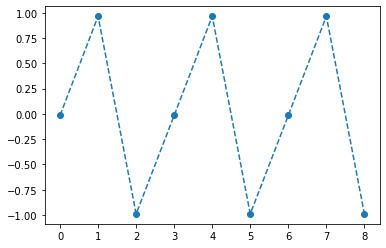

In [17]:
plt.plot(hidden[:9],'--o')

2번째 layer(hidden layer)까지 통과하고 한번 더 linear transform을 거치게 되면 여기 있는 하나의 값이 3개로 잘라지는데 잘라진 3개를 각각 플랏하면 다음과 같다.

In [41]:
net(x)[:5]

tensor([[-1.4755,  0.9098, -1.4745],
        [-6.0618,  1.2108,  3.7086],
        [ 3.0875,  0.6104, -6.6312],
        [-1.4755,  0.9098, -1.4745],
        [-6.0618,  1.2108,  3.7086]], grad_fn=<SliceBackward0>)

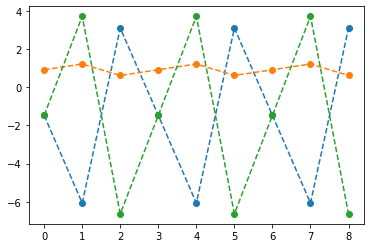

In [18]:
plt.plot(net(x).data[:9],'--o') # 파(a)->주(b)->초(c) 순서로 값들이 나타남.

- $x= a,b,c,a,b,c\dots$
- $y = b,c,a,b,c,a\dots$
- 주황색 선의 학습상태가 썩 마음에 들지 않는다. 초록색은 확실하게 초록색, 파란색은 확실하게 파란색인데 주황색은 딱히 그런게 없다.
- 약간 그런느낌 파란색도 아니고 초록색도 아니니까 얘(주황)로 하지

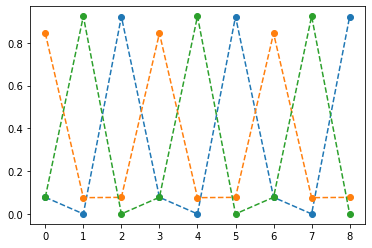

In [45]:
plt.plot(yhat[:9],'--o')
#plt.plot(soft(net(x)).data[:9],'--o')

In [46]:
yhat[:5] # b일확률이 84%.. (주->b일확률, 초->c일확률, 파->a일확률)

tensor([[7.7743e-02, 8.4444e-01, 7.7818e-02],
        [5.2772e-05, 7.6005e-02, 9.2394e-01],
        [9.2247e-01, 7.7472e-02, 5.5484e-05],
        [7.7743e-02, 8.4444e-01, 7.7818e-02],
        [5.2772e-05, 7.6005e-02, 9.2394e-01]])

In [47]:
y[:5]

tensor([1, 2, 0, 1, 2])

- 억지로 맞추고 있긴한데 파라메터가 부족해보인다.

## `-` 결과시각화1 (위와 똑같은 그림임)

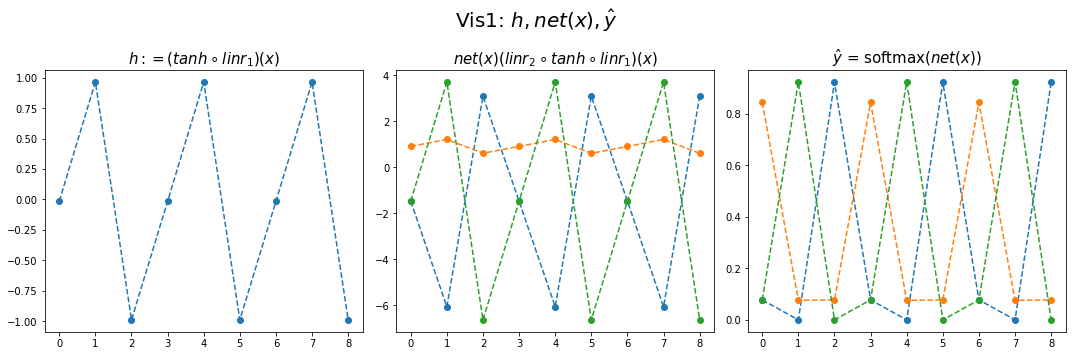

In [57]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$', size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x)(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h, net(x),\hat{y}$", size=20)
plt.tight_layout()

In [61]:
hidden[:9], (net[-1].weight).T, net[-1].bias.data

(tensor([[-0.0147],
         [ 0.9653],
         [-0.9896],
         [-0.0147],
         [ 0.9653],
         [-0.9896],
         [-0.0147],
         [ 0.9653],
         [-0.9896]]),
 tensor([[-4.6804,  0.3071,  5.2894]], grad_fn=<PermuteBackward0>),
 tensor([-1.5440,  0.9143, -1.3970]))

- (파랑, 주황, 초록) 순서로 그려짐
- 파랑 = hidden * (-4.6804) + (-1.5440)
- 주황 = hidden * (0.3071) + (0.9143)    ## 상대적으로 weight, bias가 어정쩡
- 초록 = hidden * (5.2894) + (-1.3970)

초록색과 파란색에 대한 클래스는 확실하게 특징을 파악해서 잘 학습한 것 같은데 주황색은 그냥 초록색과 파란색이 아니기 때문에 주황색인 느낌이다.

`-` 내부동작을 잘 뜯어보니까 사실 엉성해. 엄청 위태위태하게 맞추고 있었음.

- weight: 파랑과 초록을 구분하는 역할을 함.
- weight + bias: 뭔가 교묘하게 에매한 주황값을 만들어서 에매하게 'b'라고 나올 확률을 학습시킨다. $\to$ 사실 학습하는 것 같지 않고 때려맞추는 느낌, 쓸 수 있는 weight가 한정적이라서 생기는 현상 (양수, 음수, 0)

---

[**참고**](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)**: torch.nn.Linear()의 비밀?**

- 사실 $y=x\bf{W}+b$ 꼴에서의 $\bf{W}$와 $b$가 저장되는게 아니다.
- $y =x\bf{A}^T+b$꼴에서의 $\bf{X}$와 $b$가 저장된다.
- $\bf{W}=\bf{A}^T$ 인 관계에 있으므로 l1.weight가 우리자 생각하는 $\bf{W}$로 해석하려면 사실 transpose를 취해줘야 한다.

**왜 이렇게..?**

- 계산의 효율성 때문 (numpy의 구조를 알아야함)
- $x,y$는 수학적으로는 col-vec이지만 메모리에 저장할 시에는 row-vec로 해석하는 것이 자연스럽다. (사실 메모리는 격자모양으로 되어있지 않음)

---

## `-` 결과시각화2

똑같은 내용을 다른방식으로 시각화 한 것임.

In [63]:
combined = torch.concat([hidden, net(x).data, yhat],axis=1)

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

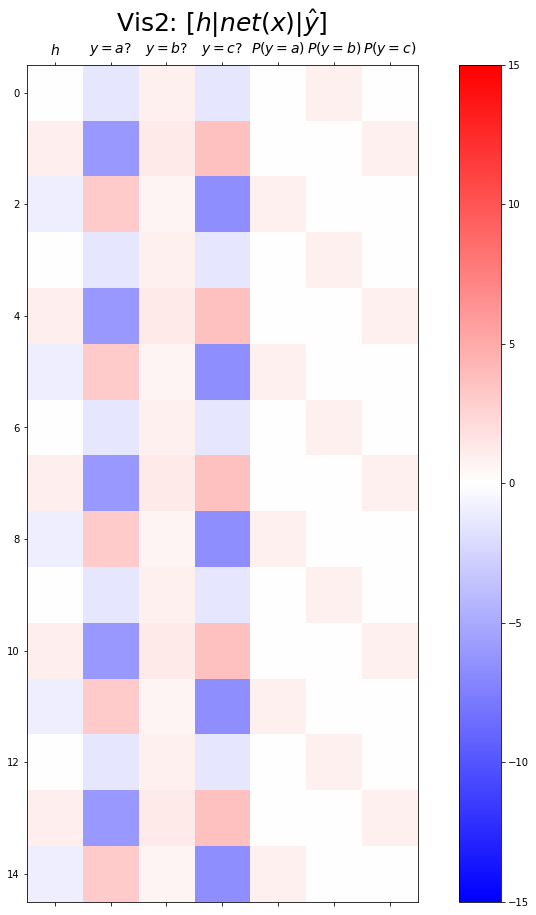

In [78]:
plt.matshow(combined[:15], vmin=-15, vmax=15, cmap='bwr')
plt.xticks(range(7), labels=[r'$h$',r'$y=a?$',r'$y=b?$',r'$y=c?$',r'$P(y=a)$',r'$P(y=b)$',r'$P(y=c)$'], size=14)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$", size=25)

softmax를 취하기 전단계인 net(x)(*2열~4열*)에서 가장 빨간색인 부분만 살아남아 빨간색(*5~7열*)이 되고, 나머지 부분은 흰색으로 바뀌게 된다.

위의 그림에서 첫번째 행에서 2~4번째 열을 보면 에매한 파란색, 에매한 빨간색으로 b가 되는 느낌.

# Exam3: abcd

## data

In [79]:
txt = list('abcd')*100
txt[:10]

['a', 'b', 'c', 'd', 'a', 'b', 'c', 'd', 'a', 'b']

In [80]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [81]:
txt_x[:5], txt_y[:5]

(['a', 'b', 'c', 'd', 'a'], ['b', 'c', 'd', 'a', 'b'])

## 하나의 은닉노드를 이용한 풀이 - 억지로 성공

`-` 데이터 정리

In [82]:
mapping = {'a':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 0]), tensor([1, 2, 3, 0, 1]))

`-` 학습

In [91]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4, embedding_dim=1),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1, out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [94]:
net[0].weight.data = torch.tensor([[-0.3333],[-2.5000],[5.0000],[0.3333]])

net[-1].weight.data = torch.tensor([[1.5000],[-6.0000],[-2.0000],[6.0000]])
net[-1].bias.data = torch.tensor([0.1500, -2.0000,  0.1500, -2.000])

In [95]:
net[0]

Embedding(4, 1)

In [96]:
for epoc in range(5000):
    ## 1
    ## 2
    loss = loss_fn(net(x),y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

### `-` 결과시각화1

In [97]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

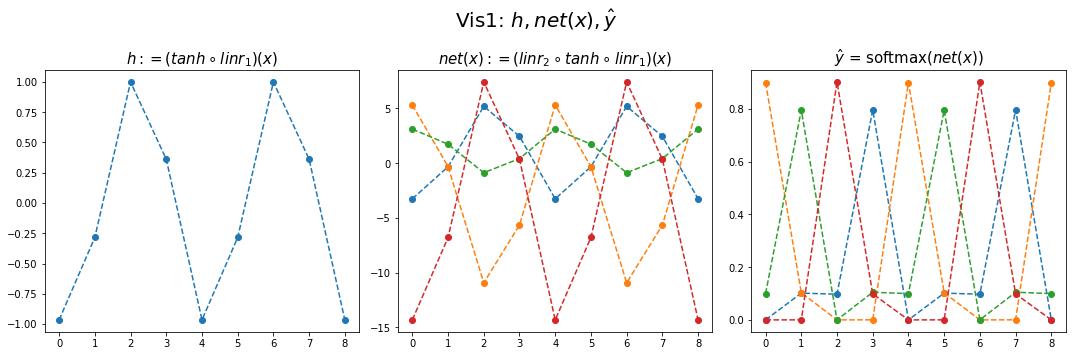

In [98]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

- 주황색과 빨간색을 특징을 잘 파악했는데 녹색과 파란색은 좀 에매하게 특징을 파악했지만 어쩌다보니 결과는 잘 나옴.

### `-` 결과시각화2

In [99]:
combined = torch.concat([hidden, net(x).data, yhat], axis=1)
combined.shape

torch.Size([399, 9])

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

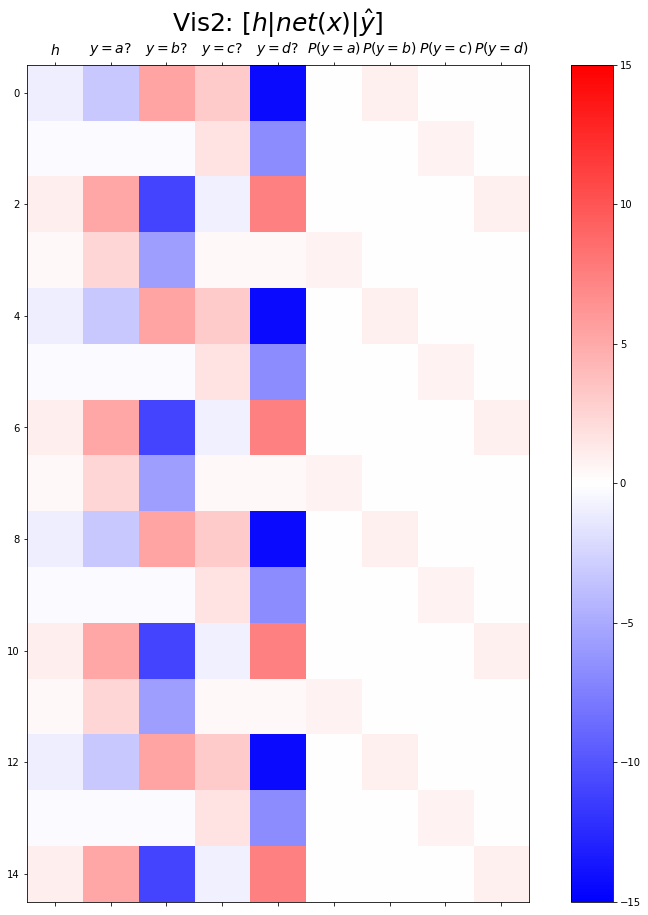

In [100]:
plt.matshow(combined[:15],vmin=-15,vmax=15,cmap='bwr')
plt.xticks(range(9), labels=[r'$h$',r'$y=a?$',r'$y=b?$',r'$y=c?$',r'$y=d?$',r'$P(y=a)$',r'$P(y=b)$',r'$P(y=c)$',r'$P(y=d)$'],size=14)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

## 두개의 은닉노드를 이용한 풀이 - 깔끔한 성공

`-` 데이터정리

In [101]:
mapping = {'a':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 0]), tensor([1, 2, 3, 0, 1]))

`-` 학습

In [103]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=2), # 은닉노드 2개
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [104]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

### `-` 결과시각화1

In [105]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

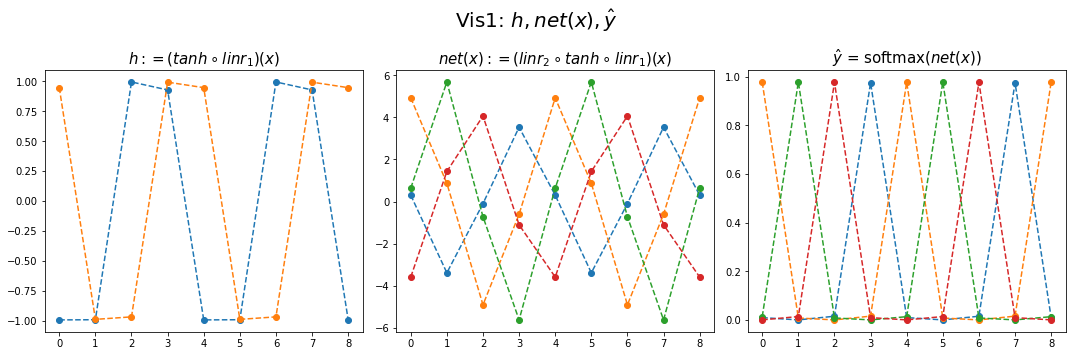

In [106]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

**(맨 왼쪽 그림)** 2개의 노드를 썼으니까 파랑이와 주황색선 두개가 보인다. 
- h dimension $(n,1)\to(n,2)$
- 주황이가 확실히 1, -1 호불호가 갈려서 학습이 된다.
- 파랑이도 1, -1 두가지로 갈려서 학습이 된다.

맨 왼쪽그림에서 적당한 선형변환을 통해 2번째 그림을 만들어야 하고, 여기서 3번째 그림을 만들어야 한다. 
- 가장 오른쪽 그림의 출력결과만 봐도 매우 깔끔하게 나온다!
- 높은 확률로 깔끔하게 예측하고 있음을 볼 수 있다.

### `-` 결과시각화2

In [107]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([399, 10])

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

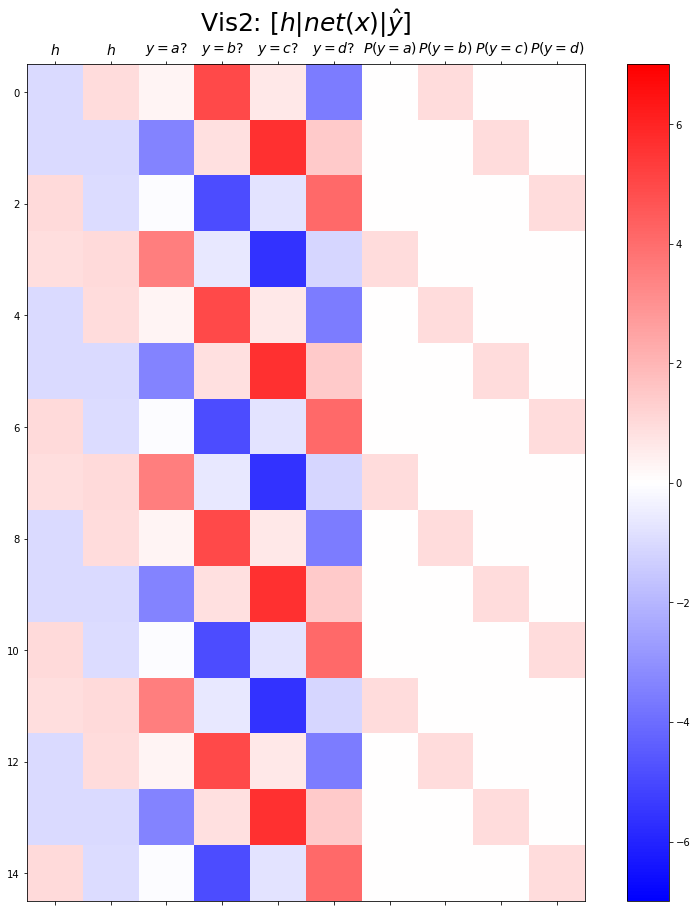

In [108]:
plt.matshow(combined[:15],vmin=-7,vmax=7,cmap='bwr')
plt.xticks(range(10), labels=[r'$h$',r'$h$',r'$y=a?$',r'$y=b?$',r'$y=c?$',r'$y=d?$',r'$P(y=a)$',r'$P(y=b)$',r'$P(y=c)$',r'$P(y=d)$'],size=14)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

- hidden layer는 $-1\sim 1$ 값을 가질 수 있다.
    - 파,빨 $\to$ b
    - 파,파 $\to$ c
    - 빨,파 $\to$ d
    - 빨,빨 $\to$ a
    
이런식으로 hidden layer에 있는 특징들도 결과를 해석하기에 좋은 형태로 잘 학습되어 있다.

- 빨간색일수록 근거가 뚜렷함. 특징이 그전에 비해서 굉장히 명확하게 학습이 되고 있다는 것을 알 수 있다.

- 그 전에는 b와 d는 특징을 잘 파악하고 있는데 a,c는 약간 에매했지만 이번에는 a,b,c,d의 특징들을 잘 이해하고 맞추는 것처럼 느껴진다.

# Exam4: AbAcAd

## data

In [109]:
txt = list('AbAcAd')*100
txt[:10]

['A', 'b', 'A', 'c', 'A', 'd', 'A', 'b', 'A', 'c']

In [110]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [111]:
txt_x[:5],txt_y[:5]

(['A', 'b', 'A', 'c', 'A'], ['b', 'A', 'c', 'A', 'd'])

## 두개의 은닉노드를 이용한 풀이 - 실패

`-` 데이터정리

In [113]:
mapping = {'A':0, 'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x, mapping))
y = torch.tensor(f(txt_y, mapping))
x[:5], y[:5]

(tensor([0, 1, 0, 2, 0]), tensor([1, 0, 2, 0, 3]))

`-` 학습

In [115]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4, embedding_dim=2),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2, out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [116]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2
    loss = loss_fn(yhat, y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

### `-` 결과시각화1

In [117]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

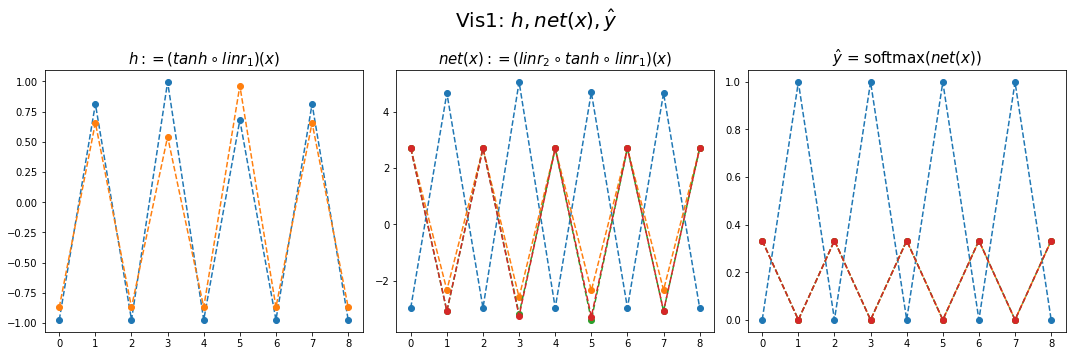

In [123]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

### `-` 결과시각화2

In [124]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([599, 10])

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

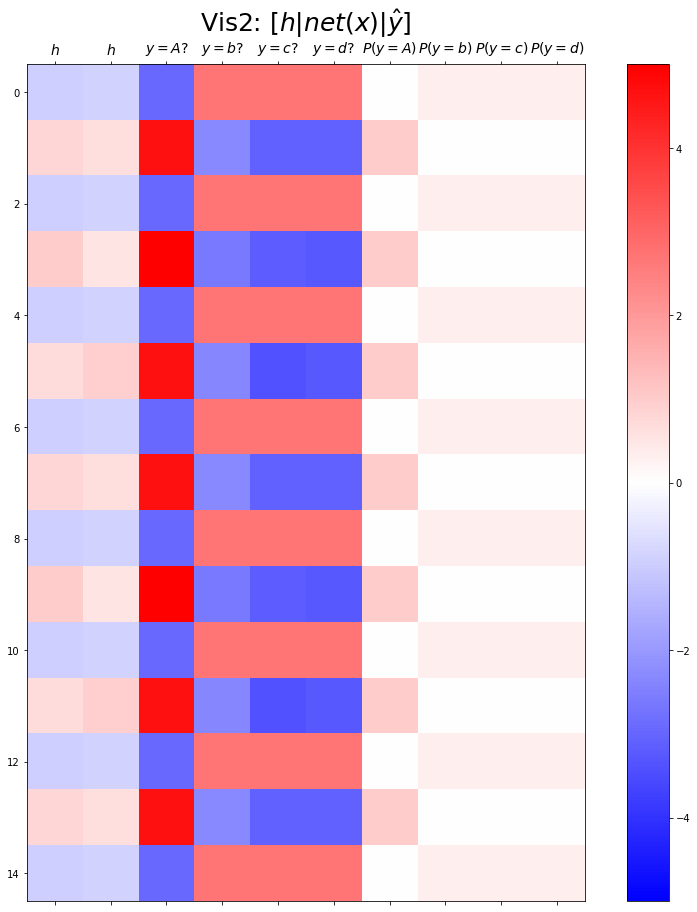

In [125]:
plt.matshow(combined[:15],vmin=-5,vmax=5,cmap='bwr')
plt.xticks(range(10), labels=[r'$h$',r'$h$',r'$y=A?$',r'$y=b?$',r'$y=c?$',r'$y=d?$',r'$P(y=A)$',r'$P(y=b)$',r'$P(y=c)$',r'$P(y=d)$'],size=14)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

- $x = \text{AbAcAd}\dots$
- $y = \text{bAcAdA}\dots$

결국 A의 자리만 잘 찾고 b,c,d끼리는 구분을 잘 못하는 느낌이다. (1/3확률로 찍는 느낌)

히든노드를 2개로 하고 잘 한 것 같은데 왜 이런 결과가 나올까?

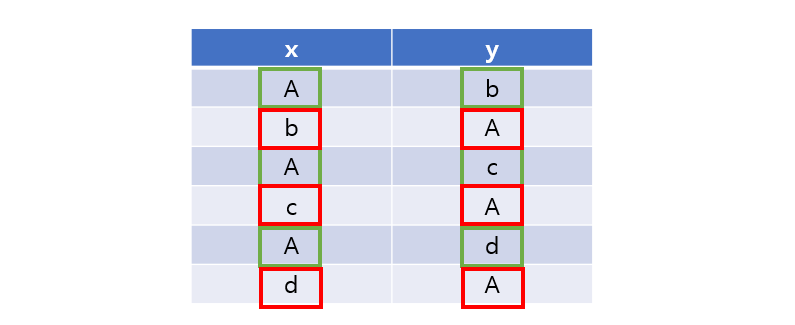

데이터를 살펴보자. 보니까 A->b, A->c, A->d ??? A다음에 뭐가 나올지 맞출 수가 없다.

- 인간은 추론해서 맞출 수 있겠지만 컴퓨터는 데이터를 바로 직전에 있는 character만 보고 다음을 예측하게끔 우리가 데이터셋을 구성해서 x,y로 줬다. 

- 그런데 사실은 바로 직전이 아니고 그 직전에 직전도 보고 뭔가 이렇게 좀 여러개를 이제 봐야한다는 것이다.

- 해결책? 한칸을 더 보게하면 된다. but 엄밀히 말하면 해결이 아님!

***실패***

`-` 실패를 해결하는 순진한 접근방식: 위 문제를 해결하기 위해서는 아래와 같은 구조로 데이터를 다시 정리하면 될 것이다.

|  x  |   y  |
|:---:|:----:|
|A,b|A|
|b,A|c|
|A,c|A|
|c,A|d|
|A,d|A|
|d,A|b|
|A,b|A|
|b,A|c|
|$\cdots$|$\cdots$|


`-` 순진한 접근방식의 비판

- 결국 정확하게 직전 2개의 문자를 보고 다음 문제를 예측하는 구조
- 만약에 직전 3개의 문자를 봐야하는 상황이 된다면 또 다시 코드를 수정해야함.
- 그리고 실전에서는 직전 몇 개의 문자를 봐야하는지 모름.

앞에있는 2개, 3개, 4개.. 이러한 구조를 반영할 수 있는 새로운 네트워크를 고안해냈는데 그것은 바로 **순환신경망**이다.

지금까지는 순환신경망의 필요성에 대해 알아보았던 것!

***이것에 대한 해결책은 순환신경망이다.(NEXT)***

# 숙제

주어진 자료가 다음과 같다고 하자.

In [128]:
txt = list('abcde')*100
txt[:10]

['a', 'b', 'c', 'd', 'e', 'a', 'b', 'c', 'd', 'e']

In [129]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [130]:
txt_x[:5],txt_y[:5]

(['a', 'b', 'c', 'd', 'e'], ['b', 'c', 'd', 'e', 'a'])

아래 코드를 변형하여 적절한 네트워크를 설계하고 위의 자료를 학습하라. (깔끔한 성공을 위한 최소한의 은닉노드를 설정할 것.)

```python
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=??,embedding_dim=??),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=??,out_features=??)
)
```

## 도전1 (은닉노드 2개)

In [157]:
mapping = {'a':0,'b':1,'c':2,'d':3,'e':4}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 4]), tensor([1, 2, 3, 4, 0]))

In [158]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=5,embedding_dim=2),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=5)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [159]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2
    loss = loss_fn(yhat,y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

### `-` 결과시각화1

In [160]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

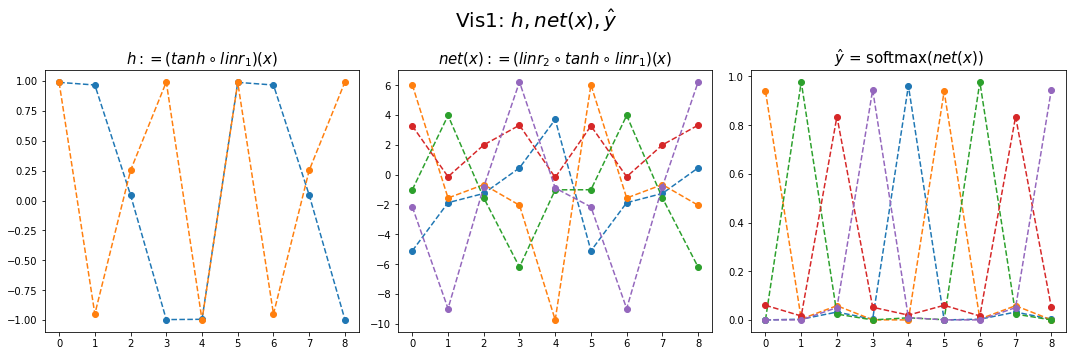

In [161]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

### `-` 결과시각화2

In [162]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([499, 12])

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

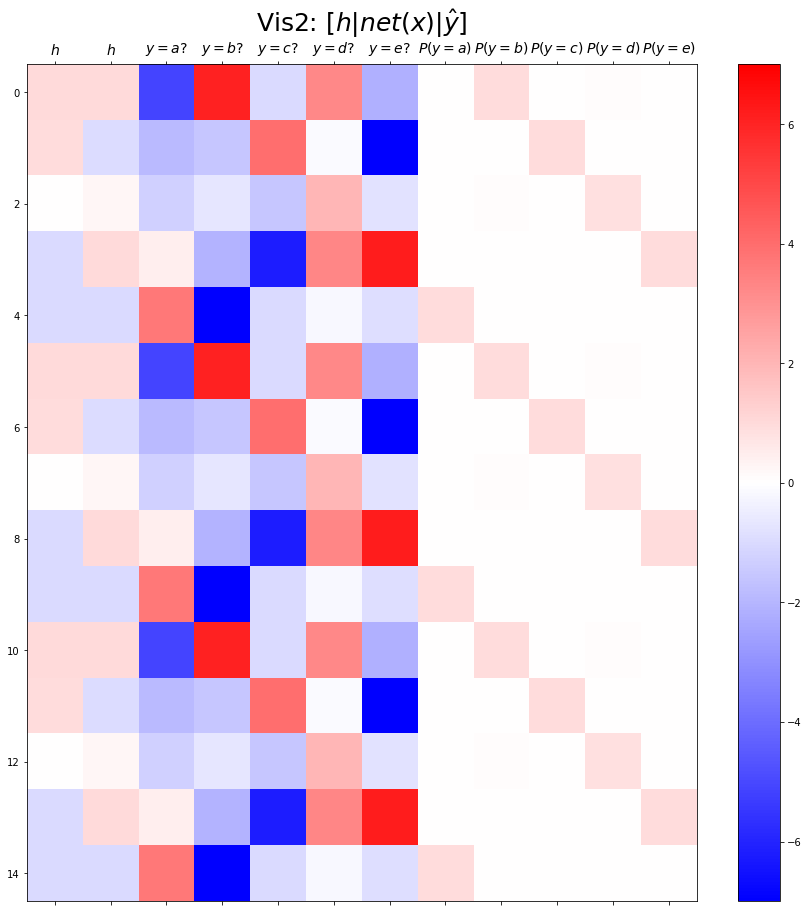

In [163]:
plt.matshow(combined[:15],vmin=-7,vmax=7,cmap='bwr')
plt.xticks(range(12), labels=[r'$h$',r'$h$',r'$y=a?$',r'$y=b?$',r'$y=c?$',r'$y=d?$', r'$y=e?$',r'$P(y=a)$',r'$P(y=b)$',r'$P(y=c)$',r'$P(y=d)$',r'$P(y=e)$'],size=14)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

- 실패

## 도전2 ( 은닉노드 3개)

In [164]:
mapping = {'a':0,'b':1,'c':2,'d':3,'e':4}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 4]), tensor([1, 2, 3, 4, 0]))

In [165]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=5,embedding_dim=3),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=3,out_features=5)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [166]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2
    loss = loss_fn(yhat,y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

### `-` 결과시각화1

In [167]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

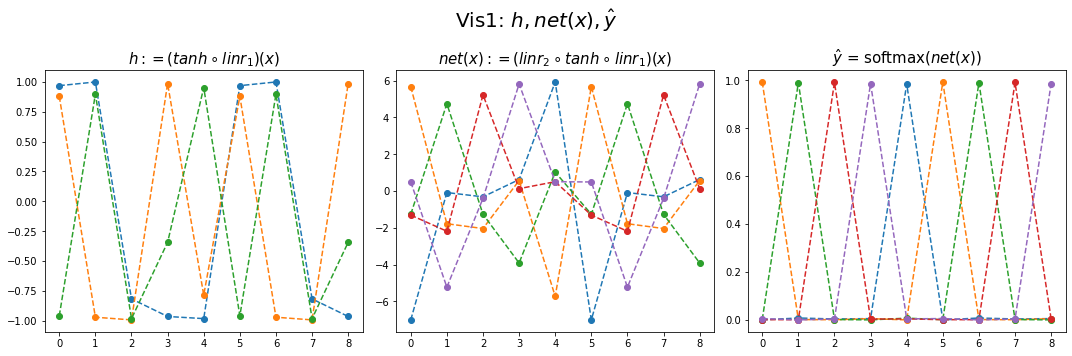

In [168]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

### `-` 결과시각화2

In [169]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([499, 13])

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

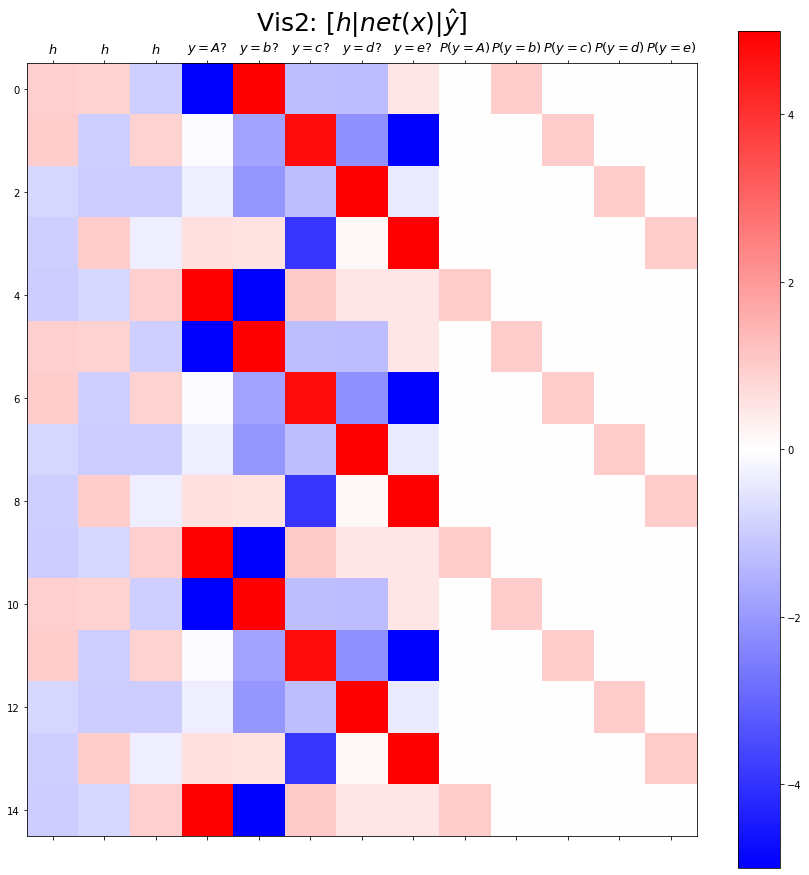

In [170]:
plt.matshow(combined[:15],vmin=-5,vmax=5,cmap='bwr')
plt.xticks(range(13), labels=[r'$h$',r'$h$',r'$h$',
                              r'$y=A?$',r'$y=b?$',r'$y=c?$',r'$y=d?$',r'$y=e?$',
                              r'$P(y=A)$',r'$P(y=b)$',r'$P(y=c)$',r'$P(y=d)$',r'$P(y=e)$'],size=13)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

a,b,c,d,e를 표현함에 있어서 3개의 은닉노드면 충분하다.

- 1개의 은닉노드 $\to$ 2개의 문자를 표현할 수 있음

- 2개의 은닉노드 $\to$ 4개의 문자를 표현할 수 있음

- 3개의 은닉노드 $\to$ 8개의 문자를 표현할 수 있음